# Problem Statement:
To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank. 

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data.

In [2]:
cdata = pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
cdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
cdata.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [5]:
cdata.shape

(660, 7)

In [6]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
#drop data not needed for clustering
cdata_new = cdata.drop(['Sl_No','Customer Key'], axis =1)

In [8]:
cdata_new.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [9]:
# Check for missing value
cdata_new.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

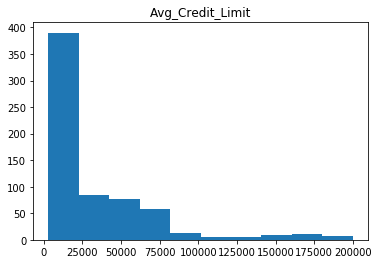

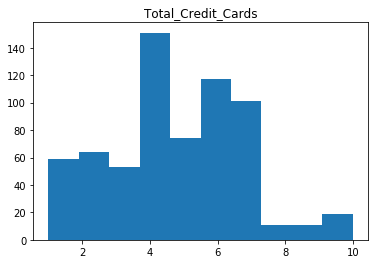

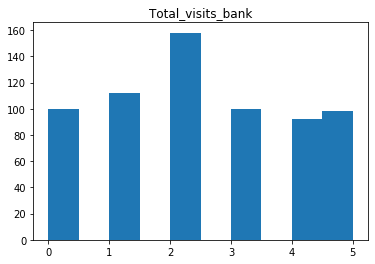

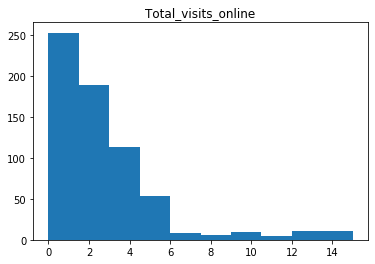

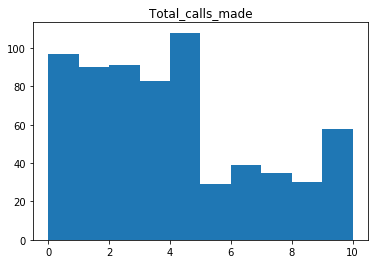

In [10]:
#plot histogram for each variable
for i in list(cdata_new.columns):
    plt.hist(cdata_new[i])
    plt.title(i)
    plt.show()

In [11]:
#Scale data
cdataAttr=cdata_new.iloc[:,:]
cdata_Scaled=cdataAttr.apply(zscore)
cdata_Scaled.corr(method='kendall')
#we can see that there isn't any major coorelation between variables

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.326996,-0.492532,-0.373968,0.310855,1.000000


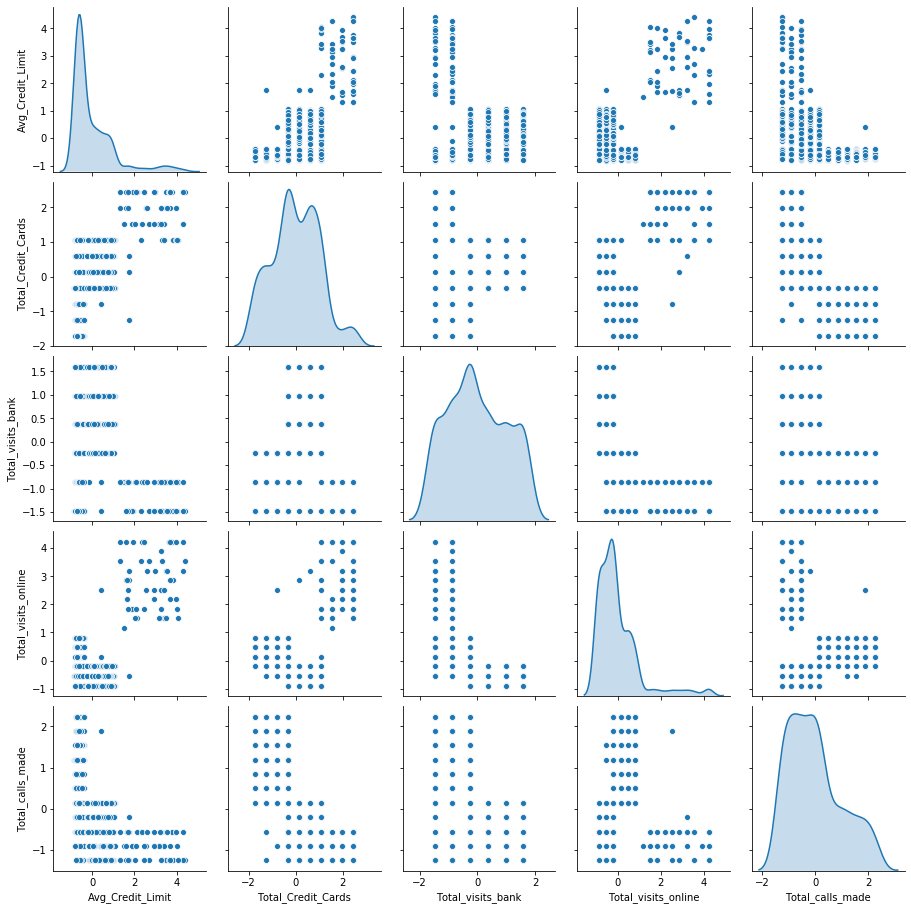

In [12]:
# Observations
# From diagonal plots we can see mainly 3-4 peaks
# Avg_Credit_Limit - shows 3-4 clusters, but is skewed
# Total_visits_bank shows mostly normal distribution
# Total_visits_online shows 3-4 clusters, but is skewed
# Total_calls_made shows 2-3 clusters
sns.pairplot(cdata_Scaled,diag_kind='kde')

In [13]:
cdata_new.groupby(cdata_new['Total_Credit_Cards']).mean()

,Avg_Credit_Limit,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,,
1,11457.627119,0.932203,3.491525,7.220339
2,13187.500000,0.921875,3.531250,6.515625
3,13301.886792,0.867925,3.698113,6.641509
4,26311.258278,2.768212,1.728477,3.529801
5,34689.189189,3.256757,1.216216,2.135135
6,33205.128205,3.555556,1.162393,1.914530
7,44495.049505,3.207921,1.584158,2.099010
8,139454.545455,0.636364,9.272727,0.818182
9,140090.909091,0.727273,11.272727,1.272727


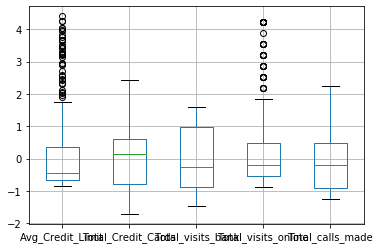

In [14]:
#outliers
cdata_Scaled.boxplot()

In [15]:
cdata_Scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


# K-means Clustering

In [16]:
# Let us now try to create clusters
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cdata_Scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})

# Identify the appropriate number of clusters using elbow chart

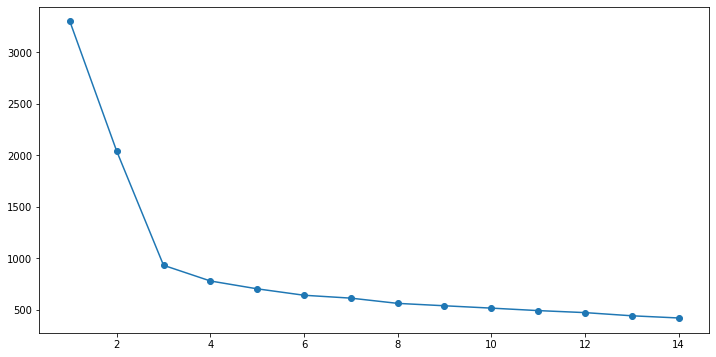

In [17]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [18]:
# We could see the bend at 3, so let us create 3 clusters

kmeans = KMeans(n_clusters=3, n_init = 5, random_state=12345)
kmeans.fit(cdata_Scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [19]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 224 386]


In [20]:
#k=3
final_model=KMeans(3)
final_model.fit(cdata_Scaled)
prediction=final_model.predict(cdata_Scaled)

#copy data
cdata_new1 = cdata_new.copy()
cdata_Scaled1 = cdata_Scaled.copy()

#Append the prediction 
cdata_new["GROUP"] = prediction
cdata_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
cdata_new.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [21]:
#observations
# Group 0 has the lowest number of total credit cards, lowest credit limit and highest number of total calls made
# Group 2 has highest number of total credit cards, highest credit limit and the lowest number of total calls made
cdata_Clust = cdata_new.groupby(['GROUP'])
cdata_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [22]:
#Silhouette Score is better when closer 1 and worse when closer to -1
#here, it is average score
from sklearn.metrics import silhouette_score
silhouette_score(cdata_Scaled,prediction)

0.5411228112448502

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022926B82D48>,
      dtype=object)

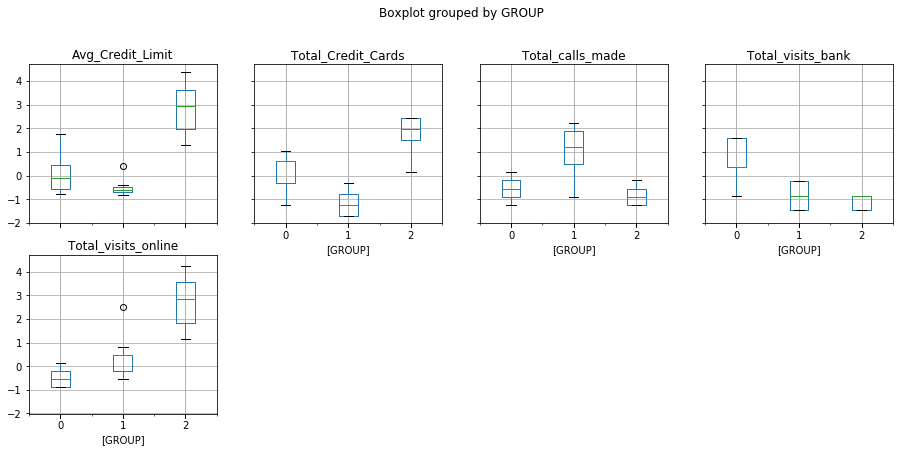

In [23]:
# Visualize the centers
# observation: Good separation of total credit cards and total visits online in the box plots
cdata_Scaled.boxplot(by = 'GROUP',  layout=(3,4), figsize=(15, 10))

# Hierarchical Clustering

In [24]:
#### generate the linkage matrix
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cdata_Scaled1, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(cdata_Scaled1))
c

0.8977080867389372

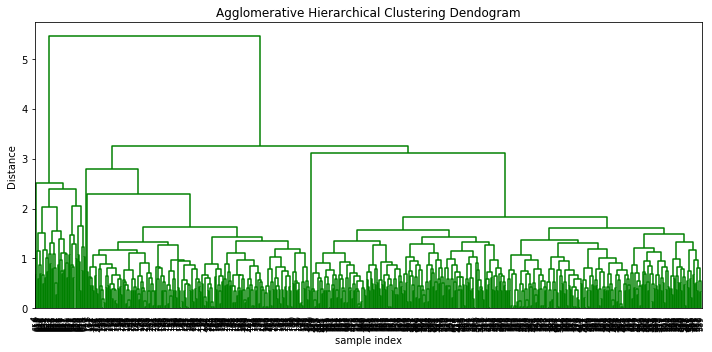

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

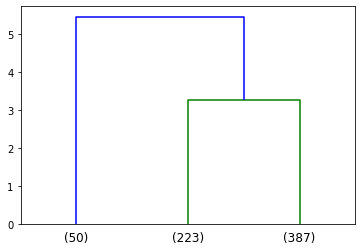

In [26]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [27]:
# Calculate Avg Silhoutte Score
#Silhouette Score is better when closer 1 and worse when closer to -1
#here, it is average score

from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
max_d=3.2
clusters = fcluster(Z, max_d, criterion='distance')

silhouette_score(cdata_Scaled1,clusters)

0.515922432650965

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229293AF588>,
      dtype=object)

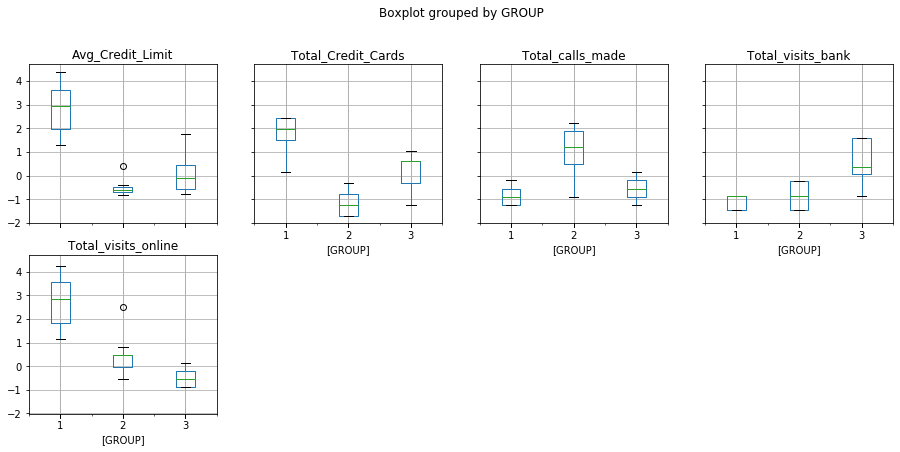

In [28]:
# Visualize the centers
cdata_Scaled1["GROUP"] = clusters
cdata_Scaled1.boxplot(by = 'GROUP',  layout=(3,4), figsize=(15, 10))

In [29]:
cdata_new1['GROUP'] = clusters
cdata_Clust = cdata_new1.groupby(['GROUP'])
cdata_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408
3,33713.178295,5.511628,3.485788,0.984496,2.005168


In [30]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cdata_Scaled1, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(cdata_Scaled1))

c

0.9000664472322701

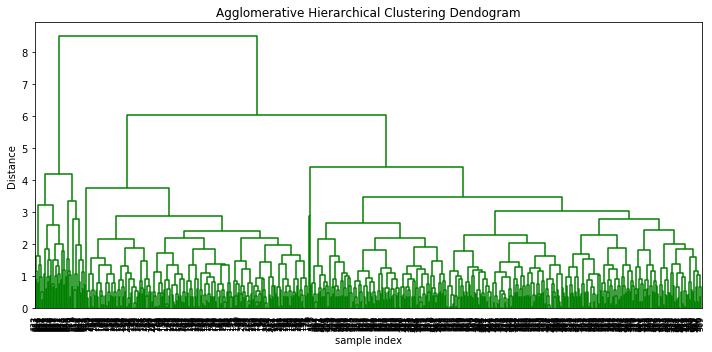

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

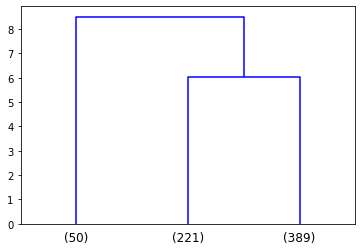

In [32]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [33]:
# Calculate Avg Silhoutte Score
#Silhouette Score is better when closer 1 and worse when closer to -1
#here, it is average score

from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
max_d=6
clusters = fcluster(Z, max_d, criterion='distance')

silhouette_score(cdata_Scaled1,clusters)

0.5394346296485818

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022928C7A608>,
      dtype=object)

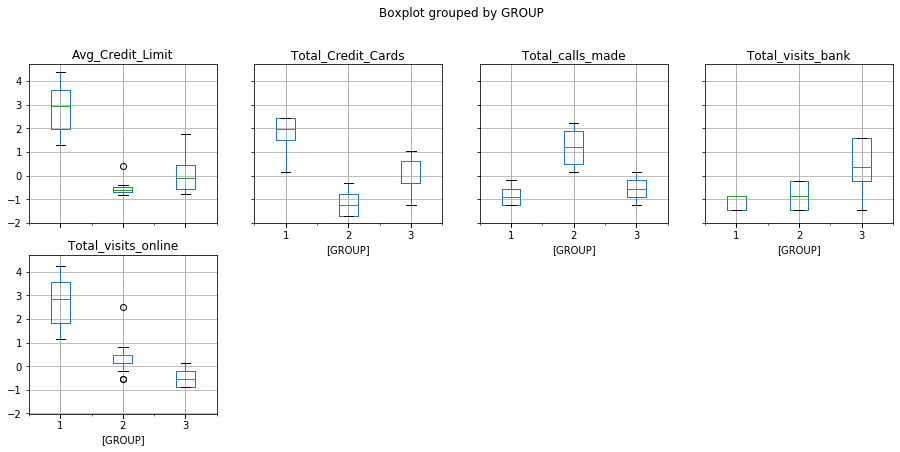

In [34]:
# Visualize the centers
cdata_Scaled1["GROUP"] = clusters
cdata_Scaled1.boxplot(by = 'GROUP',  layout=(3,4), figsize=(15, 10))

In [35]:
cdata_new1['GROUP'] = clusters
cdata_Clust = cdata_new1.groupby(['GROUP'])
cdata_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
1,141040.00000,8.740000,0.600000,10.900000,1.080000
2,12217.19457,2.402715,0.936652,3.579186,6.932127
3,33591.25964,5.496144,3.467866,0.987147,2.002571


In [36]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cdata_Scaled1, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(cdata_Scaled1))

c

0.7741813492750527

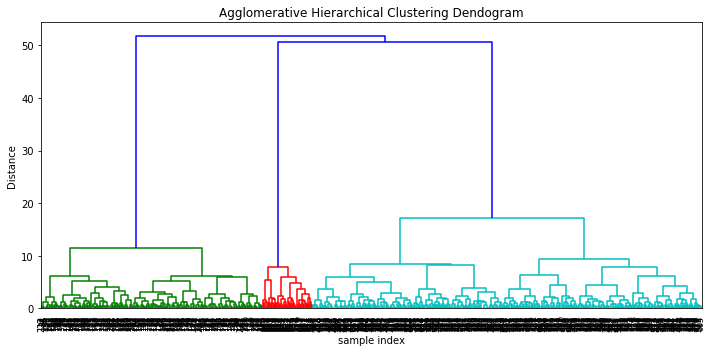

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

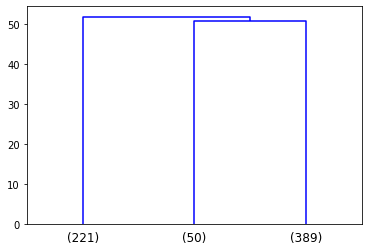

In [38]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [39]:
# Calculate Avg Silhoutte Score
#Silhouette Score is better when closer 1 and worse when closer to -1
#here, it is average score

from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
max_d=50
clusters = fcluster(Z, max_d, criterion='distance')

silhouette_score(cdata_Scaled1,clusters)

0.540039358199808

In [40]:
cdata_Scaled1["GROUP"] = clusters


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022929AE8A88>,
      dtype=object)

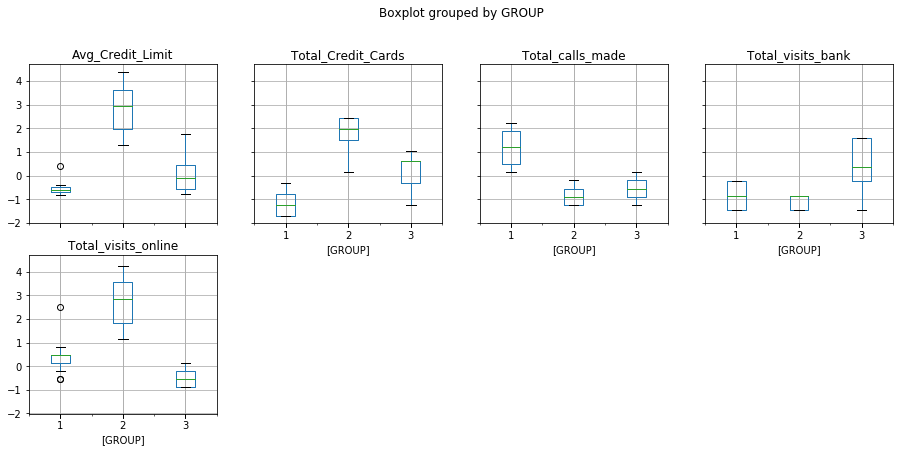

In [41]:
# Visualize the centers
cdata_Scaled1.boxplot(by = 'GROUP',  layout=(3,4), figsize=(15, 10))

In [42]:
cdata_new1['GROUP'] = clusters
cdata_Clust = cdata_new1.groupby(['GROUP'])
cdata_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
1,12217.19457,2.402715,0.936652,3.579186,6.932127
2,141040.00000,8.740000,0.600000,10.900000,1.080000
3,33591.25964,5.496144,3.467866,0.987147,2.002571


In [43]:
#Compare hierarchical clusters
#Method     #Cophenetic Score      #Silhoutte score
#Ward       0.77                   0.54
#Complete   0.90                   0.53
#Average    0.89                   0.51

#From above, it can be seen that complete linkage method resulted in the best fit clusters (high cophenetic score)

In [44]:
#compare hierarchical and k-means clusters
#both clustering techniques resulted in 3-clusters as best fit
#clusters resulting from both the techniques are very similar with good seperation achieved (as seen from the box plots 
#above along total number of credit cards and number of online vists)

#Silhoutte score for k-means clustering is comparable to hierarchical clustering (complete) at 0.53